# Difference between an autoencoder and PCA

# Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
%config InLineBackend.figure_format='svg'
plt.style.use('ggplot')
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,silhouette_score

# Making Necessary Datasets and preprocessing

**Creation of dataset**

In [5]:
X,y=make_blobs(n_samples=20000,n_features=50,centers=20,center_box=[-1,1],random_state=17,cluster_std=0.2)
#Here centers define number of clusters

In [6]:
#Define our colors for visualization
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA',
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494',
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=17)

**Preprocessing of Dataset**

In [10]:
#Defining scaler
scaler=MinMaxScaler()
#Now process the train set first
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# **Creating Baseline PCA Model**

In [12]:
pca=PCA(n_components=2)
#Now fit the pca model to the train data
pca.fit_transform(x_train)
#Now results of pca on test set
result_pca=pca.transform(x_test)

**Result Visualization**

Text(0.5, 1.0, 'PCA Result')

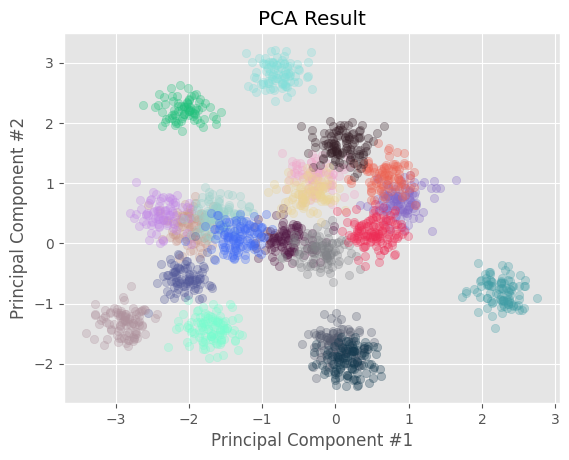

In [14]:
#Now we will visualize the pca result
#First find the unique labels
unique_labels=np.unique(y_test)
for index,unique_label in enumerate(unique_labels):
  X_data=result_pca[y_test==unique_label]

  plt.scatter(X_data[:,0],X_data[:,1],alpha=0.3,c=cols[index])

plt.xlabel("Principal Component #1")
plt.ylabel("Principal Component #2")
plt.title("PCA Result")

# Dimensionality Reduction Using Autoencoder
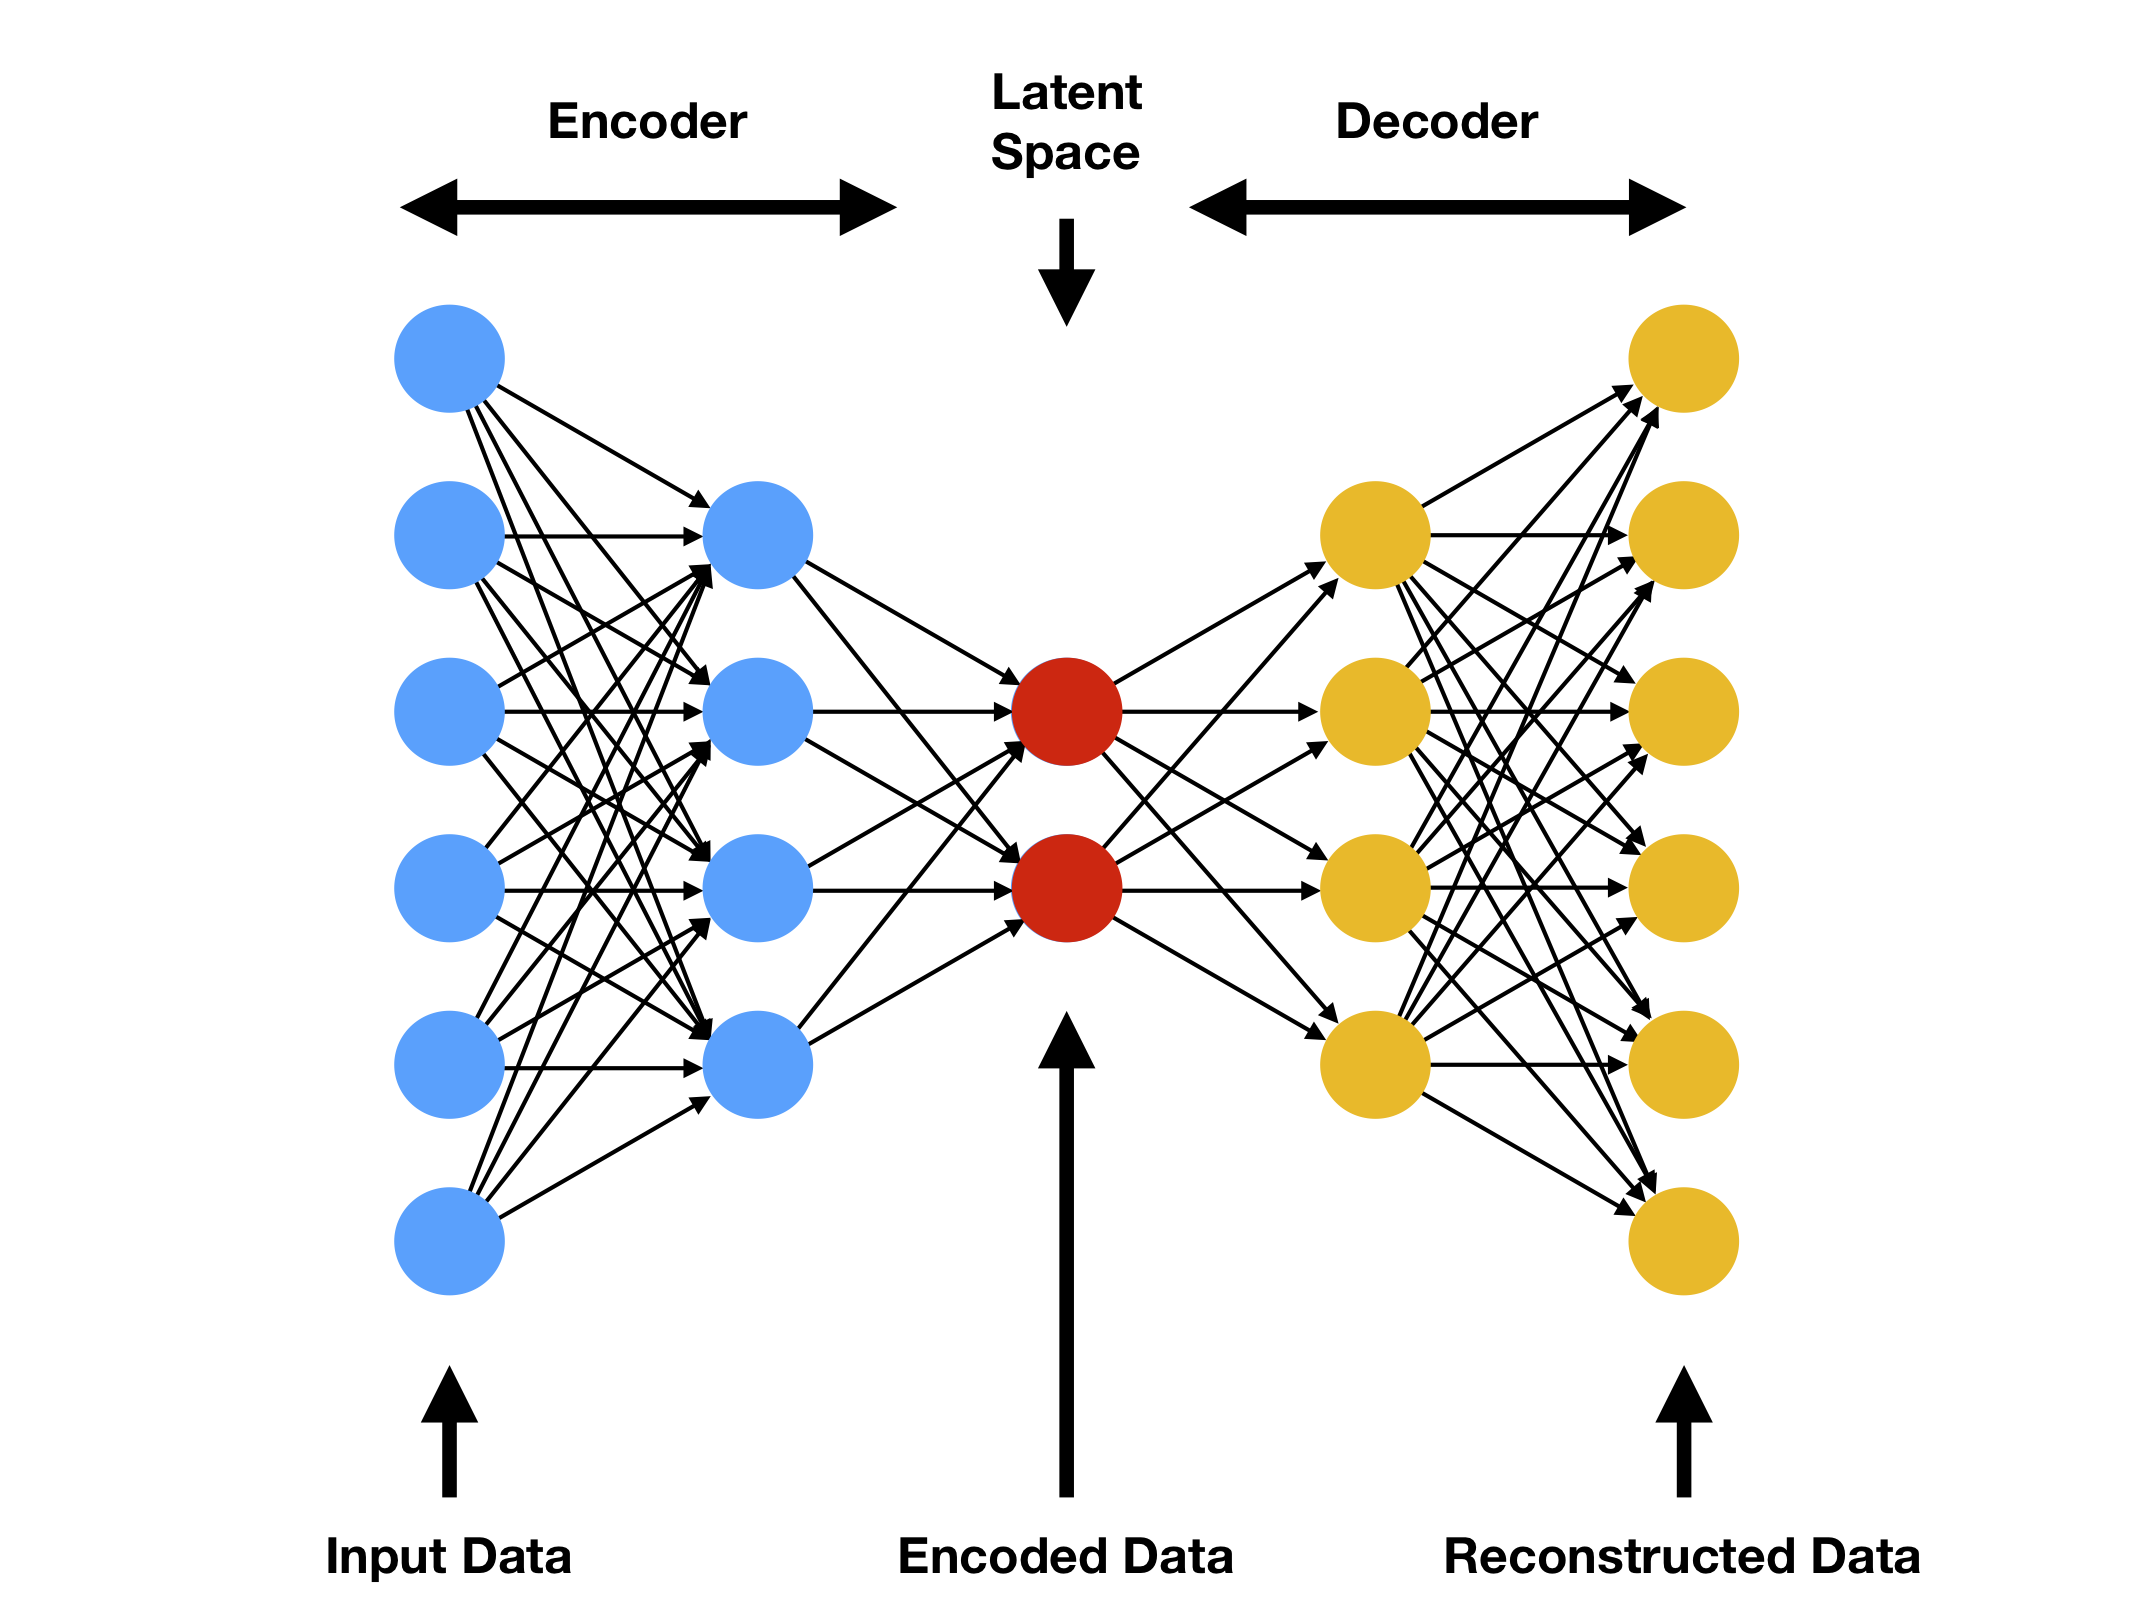


In [17]:
autoencoder=MLPRegressor(alpha=1e-15,
                         hidden_layer_sizes=[50,100,50,2,50,100,50],
                         random_state=1,
                         max_iter=20000,verbose=True
                         )
autoencoder.fit(x_train,x_train)

Iteration 28, loss = 0.00675334
Iteration 29, loss = 0.00663543
Iteration 30, loss = 0.00646007
Iteration 31, loss = 0.00607215
Iteration 32, loss = 0.00508535
Iteration 33, loss = 0.00458570
Iteration 34, loss = 0.00415622
Iteration 35, loss = 0.00384558
Iteration 36, loss = 0.00356800
Iteration 37, loss = 0.00334667
Iteration 38, loss = 0.00315697
Iteration 39, loss = 0.00302760
Iteration 40, loss = 0.00293802
Iteration 41, loss = 0.00285931
Iteration 42, loss = 0.00279667
Iteration 43, loss = 0.00272678
Iteration 44, loss = 0.00266956
Iteration 45, loss = 0.00262505
Iteration 46, loss = 0.00256280
Iteration 47, loss = 0.00250468
Iteration 48, loss = 0.00245857
Iteration 49, loss = 0.00241835
Iteration 50, loss = 0.00238043
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(alpha=1e-15, hidden_layer_sizes=[50, 100, 50, 2, 50, 100, 50],
             max_iter=20000, random_state=1, verbose=True)

# **Reducing Dimensionality with Autoencoder**

In [19]:
#First find out weights and biases
weights=autoencoder.coefs_ #W
biases=autoencoder.intercepts_ #b

In [20]:
#Now we only need encoders part
encoder_weights=weights[0:4]
encoder_biases=biases[0:4]

In [24]:
def encoder_reduce_dim(encoder_weights,encoder_biases,x):
  res_autoencoder=x
  for index,(w,b) in enumerate(zip(encoder_weights,encoder_biases)):
    #We will not apply relu for the very last layer:
    res_autoencoder=res_autoencoder@w+b
    if index+1==len(encoder_weights):
      pass
    else:
      res_autoencoder=np.maximum(0,res_autoencoder)

  return res_autoencoder


res_ae=encoder_reduce_dim(encoder_weights,encoder_biases,x_test)

**visualization**

Text(0.5, 1.0, 'Autoencoder Results')

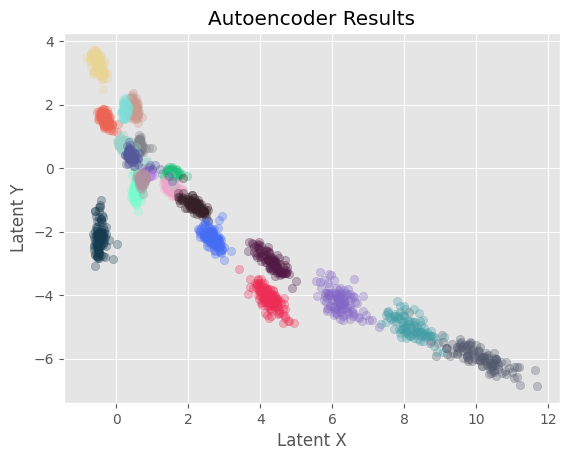

In [25]:
unique_labels=np.unique(y_test)
for index,unique_label in enumerate(unique_labels):
  Latentspace=res_ae[y_test==unique_label]

  plt.scatter(Latentspace[:,0],Latentspace[:,1],alpha=0.3,c=cols[index])

plt.xlabel("Latent X")
plt.ylabel("Latent Y")
plt.title("Autoencoder Results")

# **Comparing Results with Silhoutte score**

In [26]:
silhouette_score(x_train,y_train)

0.6109772034818249

**PCA silhoutte Score**

In [28]:
silhouette_score(result_pca,y_test)

0.3646142583475814

In [29]:
silhouette_score(res_ae,y_test)

0.5353747054986627